## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [43]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [44]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv (Path("Resources/bitstamp.csv"), index_col= "Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [45]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()
bitstamp.tail()
type(bitstamp)
bitstamp.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [46]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv (Path("Resources/coinbase.csv"), index_col= "Timestamp", parse_dates=True, infer_datetime_format=True)

In [47]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()
coinbase.tail()
type(coinbase)
coinbase.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [48]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
#bitstamp.isnull().sum() there were 473 null rows before drop
bitstamp=bitstamp.dropna()
#confirmed 0 null rows
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [49]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"]= bitstamp ["Close"].str.replace("$","")
#bitstamp #confirmed this removed $

/Users/jingpu/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [50]:
# Convert the Close data type to a float
# YOUR CODE HERE
#type (bitstamp["Close"])
bitstamp["Close"]=bitstamp["Close"].astype("float")
#bitstamp["Close"] #confirmed dtype is float64

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [51]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.duplicated().sum()
#confimrmed sum is 0.

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [54]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase.isnull().sum()
#cofirmed 473 null rows.  probably not coincidence.
#drop null rows
coinbase=coinbase.dropna()
coinbase.isnull().sum() #confirmed 0 null rows
#remove $ from Close Series
coinbase["Close"]=coinbase["Close"].str.replace ("$", "")
coinbase


/Users/jingpu/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [12]:
#checked current data type is object
type(coinbase["Close"])
#convert series to float
coinbase["Close"]=coinbase["Close"].astype("float")
coinbase["Close"] #confirmed Close series is float64

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64

In [55]:
#confimred 0 duplicate rows in coinbase
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]
#type(bitstamp_sliced) #check type is series

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,3]

# Review the first five rows of the DataFrame
coinbase_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [17]:
# Generate the summary statistics for the coinbase DataFrame
#found big error here; the two descriptions were identical and turned out I read the bitstamp.csv into both coinbase and bitstamp dataframes.  fixed this.
coinbase.describe()
#also, wanted to see description of the difference of the two dataframes in absolute value
(bitstamp-coinbase).abs().describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,128852.000000,128852.000000,128852.000000,128852.000000,128852.000000,1.288520e+05,128852.000000
mean,24.225999,25.813347,23.867054,24.289187,11.938409,1.204499e+05,24.201996
std,36.052436,37.040233,35.764572,36.027190,22.281424,2.203710e+05,35.966676
min,0.000000,0.000000,0.000000,0.000000,0.000037,5.487420e-01,0.000000
25%,6.060000,7.090000,5.670000,6.140000,1.945925,1.985058e+04,6.117751
50%,14.020000,15.650000,13.090000,14.170000,5.204049,5.392422e+04,13.974788
75%,28.590000,30.330000,27.680000,28.710000,12.915084,1.325274e+05,28.386391
max,606.800000,594.230000,499.000000,606.800000,914.059171,1.097932e+07,548.115953


<AxesSubplot:title={'center':'bitstamp vs coinbase'}, xlabel='Timestamp'>

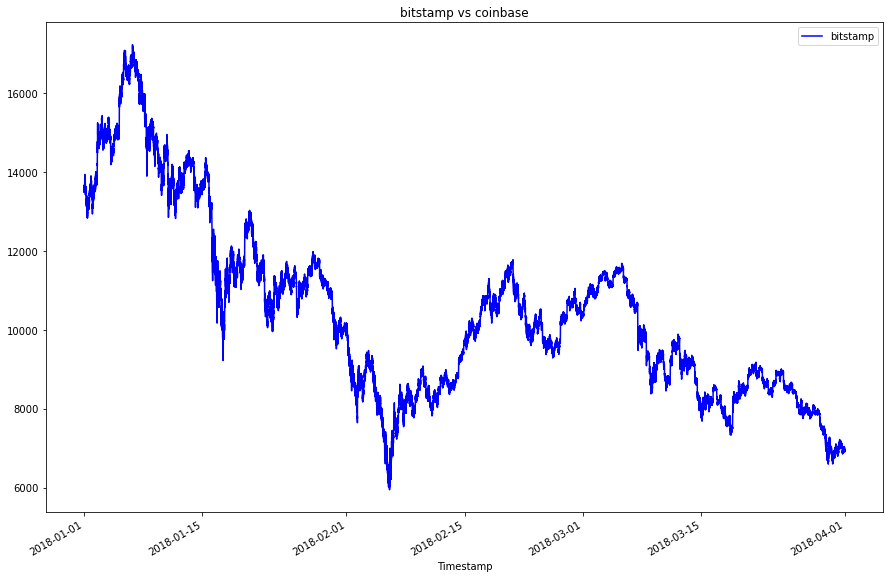

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp["Close"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase", color="blue", label="bitstamp")

<AxesSubplot:xlabel='Timestamp'>

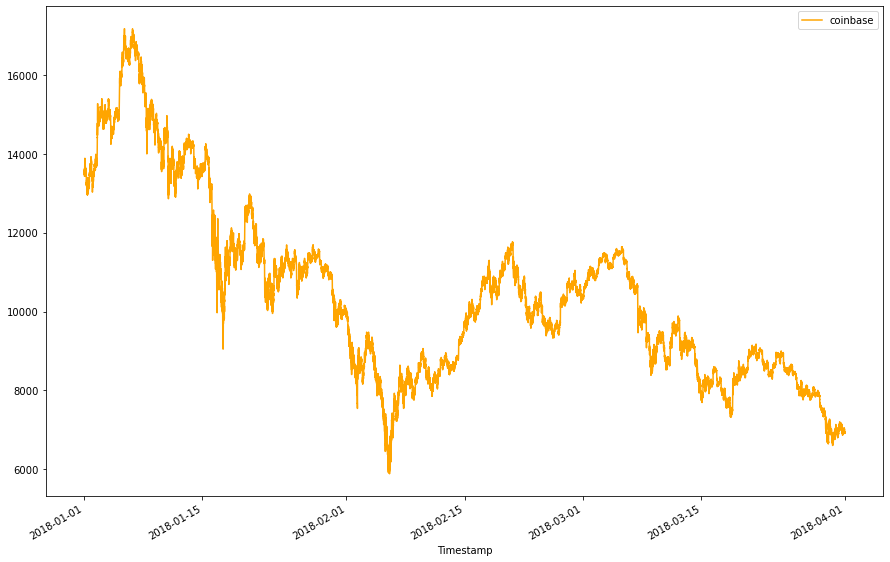

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase["Close"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

<AxesSubplot:title={'center':'bitstamp vs coinbase'}, xlabel='Timestamp'>

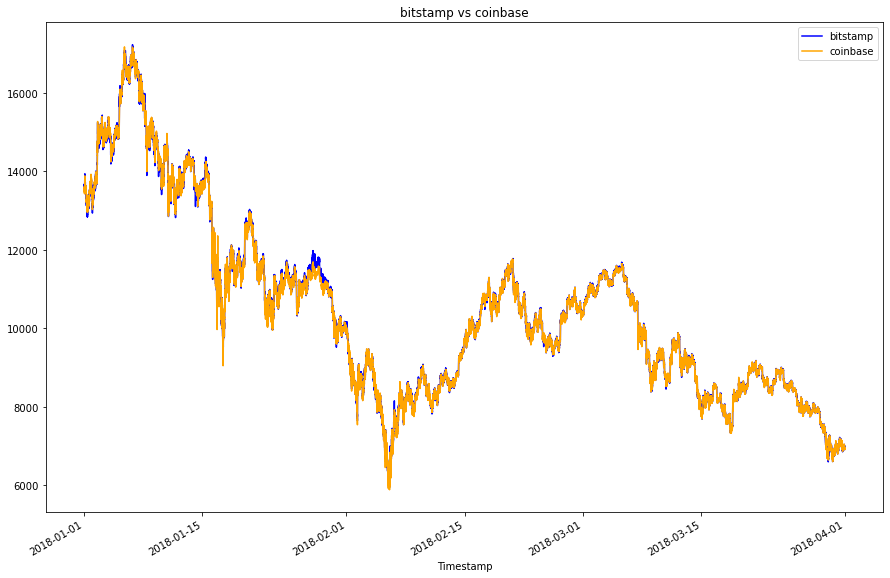

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase", color="blue", label="bitstamp")
coinbase["Close"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

<AxesSubplot:title={'center':'bitstamp vs coinbase january 2018'}, xlabel='Timestamp'>

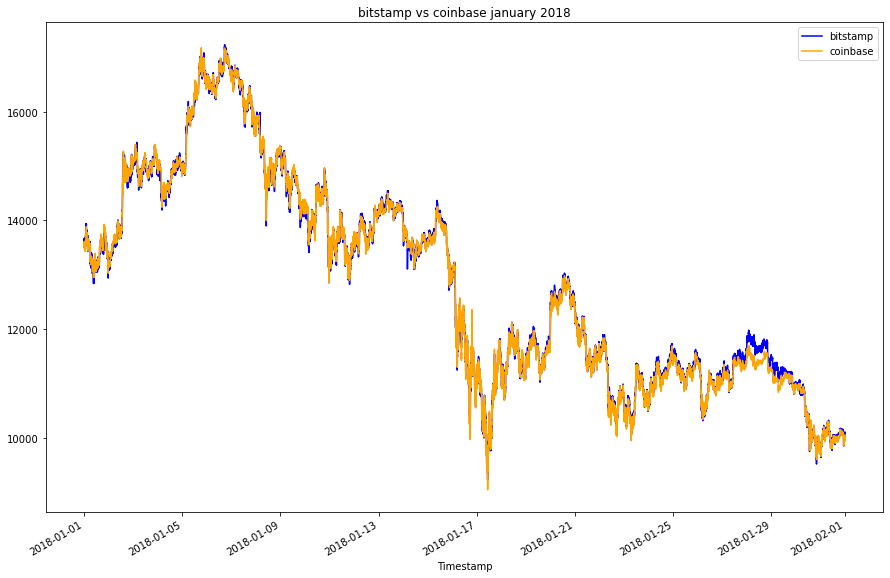

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase january 2018", color="blue", label="bitstamp")
coinbase["Close"].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

<AxesSubplot:title={'center':'bitstamp vs coinbase feb 2018'}, xlabel='Timestamp'>

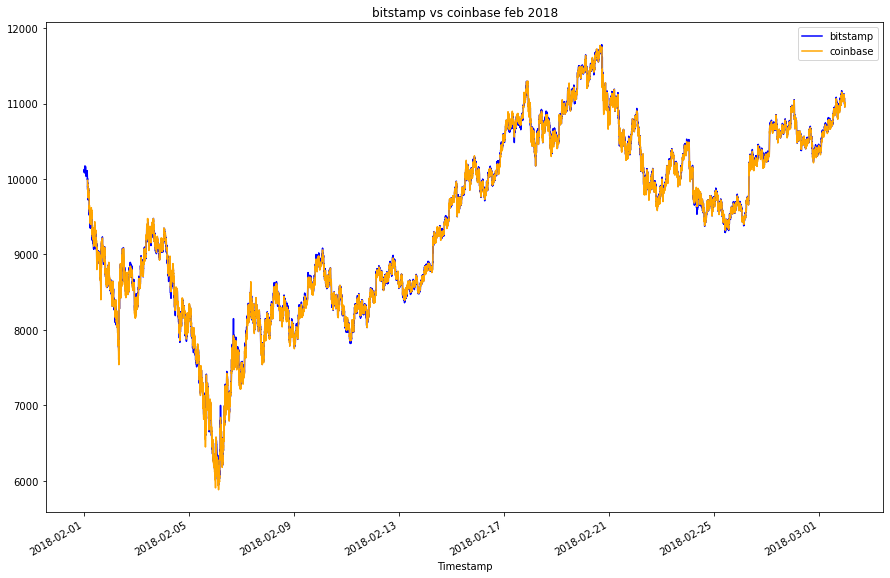

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp["Close"].loc["2018-02-01":"2018-03-01"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase feb 2018", color="blue", label="bitstamp")
coinbase["Close"].loc["2018-02-01":"2018-03-01"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The spread appears to be narrowing

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'bitstamp vs coinbase jan 1 2018'}, xlabel='Timestamp'>

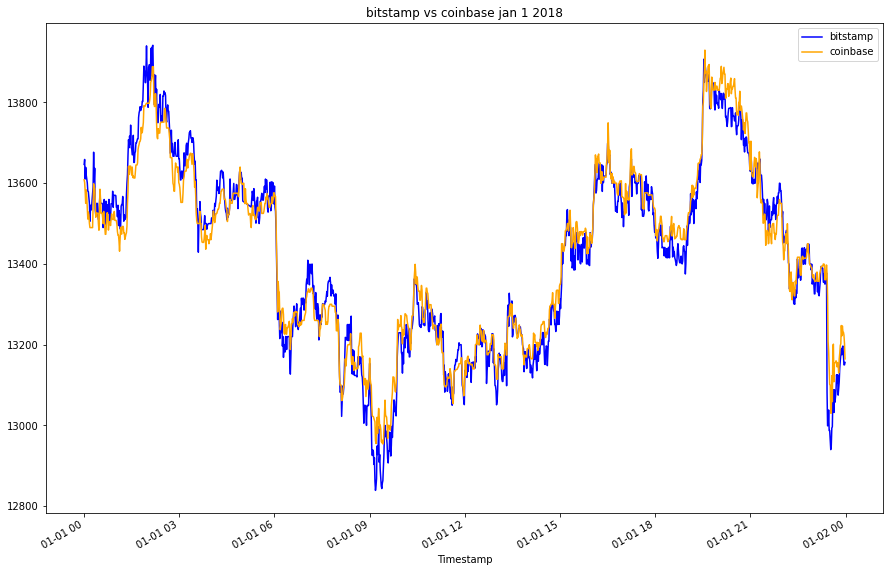

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc["2018-01-01":"2018-01-01"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase jan 1 2018", color="blue", label="bitstamp")
coinbase["Close"].loc["2018-01-01":"2018-01-01"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = (coinbase["Close"]-bitstamp["Close"]).loc["2018-01-01":"2018-01-01"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()
#arbitrage_spread_early.isnull().sum()

count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:>

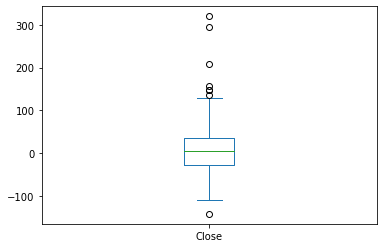

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'bitstamp vs coinbase feb 1 2018'}, xlabel='Timestamp'>

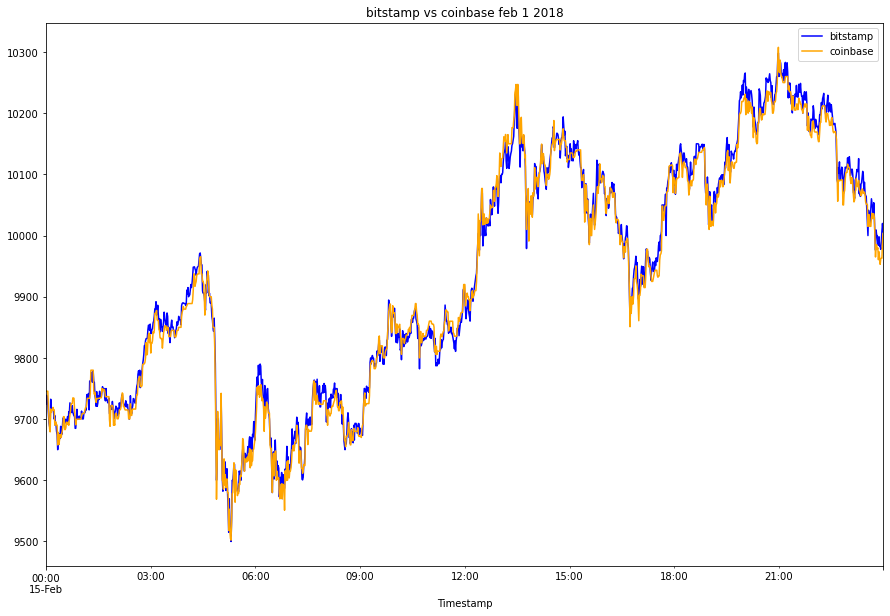

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc["2018-02-15":"2018-02-15"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase feb 1 2018", color="blue", label="bitstamp")
coinbase["Close"].loc["2018-02-15":"2018-02-15"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = (coinbase["Close"]-bitstamp["Close"]).loc["2018-02-15":"2018-02-15"]

# Generate summary statistics 
arbitrage_spread_middle.describe()
#arbitrage_spread_middle.isnull().sum() #check null values

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:>

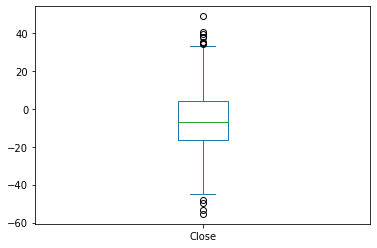

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'bitstamp vs coinbase mar 31 2018'}, xlabel='Timestamp'>

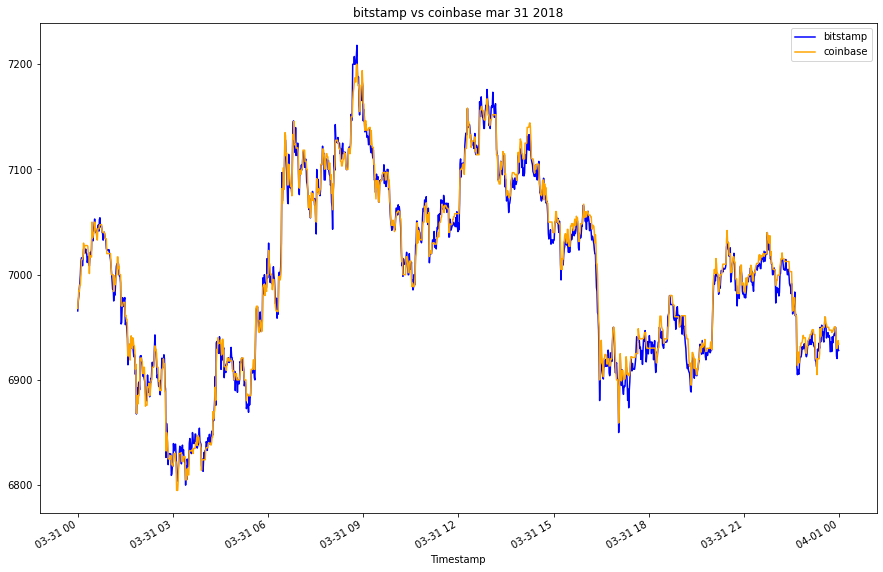

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc["2018-03-31":"2018-03-31"].plot(legend=True, figsize=(15, 10), title="bitstamp vs coinbase mar 31 2018", color="blue", label="bitstamp")
coinbase["Close"].loc["2018-03-31":"2018-03-31"].plot(legend=True, figsize=(15, 10), color="orange", label= "coinbase")

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = (coinbase["Close"]-bitstamp["Close"]).loc["2018-03-31":"2018-03-31"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe().mean()
#arbitrage_spread_late.isnull().sum() #check nulls=6

181.60353719997403

<AxesSubplot:>

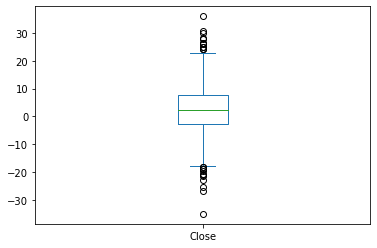

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
early=("2018-01-01")
middle=("2018-02-15")
late=("2018-03-31")

#Define a function named which_is_long that will help determine which exchange to choose which exchange is long that returns
#the long exchange and the arbitrage spread on any given day.
#see README.MD file for more information.


def which_is_long(date, coinbase, bitstamp):
    if coinbase.loc[date:date].describe().mean()<bitstamp.loc[date:date].describe().mean():
        long = coinbase.loc[date]
        short = bitstamp.loc[date]
        print ("long coinbase")
        arbitrage=short-long
    else: 
        short = coinbase.loc[date]
        long = bitstamp.loc[date]
        print ("long bitstamp")
        arbitrage=short-long
    return (arbitrage, long)

#We evaluate this function 3 times to define the following series to be used in later calculation.
#See README for further discussion

arbitrage_spread_early, early_long= which_is_long (early,coinbase["Close"],bitstamp["Close"])
arbitrage_spread_middle, middle_long=which_is_long (middle,coinbase["Close"],bitstamp["Close"])
arbitrage_spread_late, late_long=which_is_long (late,coinbase["Close"],bitstamp["Close"])
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()
#arbitrage_spread_middle.describe()
#arbitrage_spread_late.describe()

long bitstamp
long coinbase
long coinbase


count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/early_long
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0]/middle_long
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0]/late_long

In [57]:
 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.
profitable_trade_early= spread_return_early [spread_return_early>.01]
profitable_trade_middle= spread_return_middle [spread_return_middle>.01]
profitable_trade_late= spread_return_late [spread_return_late>.01]


Series([], Name: Close, dtype: float64)

In [76]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
#using describe().count() on the series, we find that there are 7 profitable trades that meet the .01 hurdle on the early date
profitable_trade_early.describe().count()
type(profitable_trade_early.describe().count())

# Use .size to find that there are 0 trades for both the middle and late opportunities.
# See README to get more information on this
profitable_trade_middle.size
profitable_trade_late.size
# Review the first five profitable trades
profitable_trade_early.head()
#there is nothing to review for the other two but here they are anyway
profitable_trade_middle.head()
profitable_trade_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [77]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or trades where the spread returns are are greater than 1%
profitable_trade_early.describe()
profitable_trade_middle.describe()
profitable_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [92]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
#profit_early = profitable_trade_early*early_long
# I compute this for middle long even though I know they are empty
profit_middle = profitable_trade_middle*middle_long
profit_late = profitable_trade_late*late_long
# Drop any missing values from the profit DataFrame
profit_early=profit_early.dropna()
profit_middle=profit_middle.dropna()
profit_late=profit_late.dropna()
# View the early profit DataFrame
profit_early
profit_middle
profit_late


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [93]:
# Generate the summary statistics for the early profit per trade DataFrame
#profit_early.describe()
#We generat the summary for middle and late as well
#profit_middle.describe()
profit_late.describe()

Series([], Name: Close, dtype: float64)

<AxesSubplot:xlabel='Timestamp'>

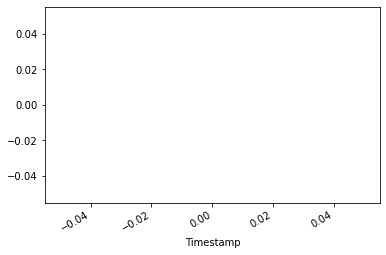

In [94]:
# Plot the results for the early profit per trade DataFrame
#profit_early.plot()

#Also plot for middle and late which is zero as expected.
profit_late.plot()
profit_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [95]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
early_profit_sum=profit_early.sum()
middle_profit_sum=profit_middle.sum()
late_profit_sum=profit_late.sum()

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [41]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()
cumulative_profit_early
#we will skip this for middle and late because they are clearly zero

Timestamp
2018-01-01 09:10:00     147.33
2018-01-01 23:25:00     441.22
2018-01-01 23:26:00     761.21
2018-01-01 23:27:00     968.54
2018-01-01 23:28:00    1115.36
2018-01-01 23:29:00    1271.22
2018-01-01 23:31:00    1406.40
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

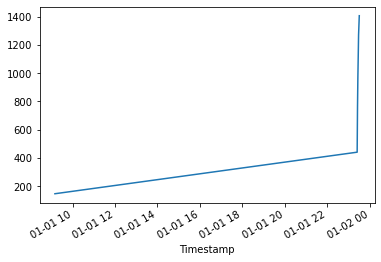

In [42]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()
#we will skip this for the other ones because they are clearly zero.

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The Spreads narrow throughout time and are virtually gone by the end of March least to meet the 1% hurdle.

In [ ]:
#finished